In [1]:
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# blob_centers = np.array([
#     [2, 3], [3, 1], [1, 2]
# ])

# blob_std = np.array([0.3, 0.2, 0.3])

# X, y = make_blobs(n_samples = 200, centers = blob_centers, cluster_std = blob_std, random_state = 11)

X, y = make_blobs(centers = 3)

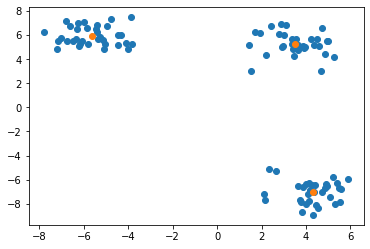

In [3]:
n_centers = 3
n_feat = 2
center_list = []
belongs_to = []

def nearest_center(x):
    dis = float('inf')
    cen = None
    for n, c in enumerate(center_list):
        m = 0
        for i in range(n_feat):
            m += (x[i]-c[i])**2
        m = math.sqrt(m)
        if m < dis:
            dis = m
            cen = n
    return cen

def assign_center():
    global belongs_to
    for i, j in enumerate(X):
        belongs_to[i] = nearest_center(j)

def new_center():
    for c in range(n_centers):
        m = X[belongs_to == c]
        if len(m) != 0:
            center_list[c] = m.mean(axis = 0)

def check_center():
    flag = 0
    for i in range(n_centers):
        for j in range(n_feat):
            if prv[i][j] != center_list[i][j]:
                flag = 1
                break
    if flag:
        return False
    return True

for k in range(n_centers):
    center_list.append([])
    for f in range(n_feat):
        center_list[k].append(random.sample(list(X[:, f]), 1)[0])
center_list = np.array(center_list)

for i in X:
    belongs_to.append(nearest_center(i))
belongs_to = np.array(belongs_to)

prv = center_list.copy()
count = 0
for i in range(5):
    assign_center()
    new_center()
    if check_center():
        if count == 3:
            break
    else:
        prv = center_list.copy()
    count += 1
    
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(center_list[:, 0], center_list[:, 1])

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

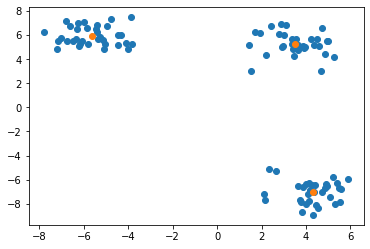

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1])

In [7]:
center_list

array([[ 3.50975686,  5.25044386],
       [-5.64681545,  5.9182872 ],
       [ 4.29926157, -7.01740182]])

In [8]:
kmeans2.cluster_centers_

array([[-5.64681545,  5.9182872 ],
       [ 4.29926157, -7.01740182],
       [ 3.50975686,  5.25044386]])